# Initial EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

from utils.analysis import nan_ratio, histogram_and_boxplot
from utils.data import (
    load_loan_payments_dataset_scoring, 
    load_loan_agencies, 
    load_loan_paymets,
    load_loan_funding_info,
    load_dindex_dataset
)
from pathlib import Path

DATA_DIR = Path("../data").resolve()

## loan_funding_origination_info

_Información sobre a qué agencia pertenece cada crédito y la fecha de creación de cada crédito._

In [2]:
funding = load_loan_funding_info(filepath=DATA_DIR / "loan_funding_origination_info.csv")

funding.head()

,LoanId,AgencyId,FundingID,OriginationDate,InstallmentAmount,Periodicity,LoanOperationalStatus,VAT,Term
0,125494,808,6,2010-07-08,26495.20,Biweekly,Paid-off,16,72
1,125498,808,6,2010-07-08,25170.44,Biweekly,Paid-off,16,72
2,125505,855,6,2010-07-09,30444.96,Biweekly,Paid-off,16,48
3,125523,11,6,2010-07-08,18148.44,Biweekly,Paid-off,16,24
4,125530,806,6,2010-07-08,26830.93,Biweekly,Paid-off,11,48


## loan_agency_product_name

_Información sobre agencia que agrupa créditos, el tipo de crédito (PDL o BGL, payday loans o business growth loans, respectivamente)._

In [3]:
agencies = load_loan_agencies(filepath=DATA_DIR / "loan_agency_product_name.csv")

agencies.head()

,AgencyId,ProductName,Country
0,1,PDL,Kamino
1,2,PDL,Kamino
2,3,PDL,Kamino
3,4,PDL,Kamino
4,5,PDL,Kamino


In [4]:
agencies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   AgencyId     1169 non-null   object
 1   ProductName  1169 non-null   object
 2   Country      1169 non-null   object
dtypes: object(3)
memory usage: 27.5+ KB


## loan_payments_dataset

_Incluye pagos y dinámica histórica (desde 2019) de las operaciones de Hopp. La creación de créditos fue removida desde 2019 en adelante. Datos hasta junio 2020 inclusive._


- 4302839 registros con información de los pagos
- Hay ~5700 registros donde la diferencia entre las variables payment es significativa
- PaymentType / PaymentTypeDescrpition son 99.6% nulls (porque la gran mayoría son pagos regulares, no hay mecanismos extra)
- Tiene `LoanId`, `PaymentId` para joinear

- LoanId (Entero): ID único del crédito.

- PaymentId (Entero): ID único de cada pago.

- PaymentSource (Categórica): Fuente de Pago (regular, contractor, alternative, additional).

- PaymentType (Entero): Variable que clasifica distintos mecanismos de pago adicional.

- PaymentTypeDescription (Categórica): Descripción de los mecanismos de pago adicional.

- PaymentAmount (Decimal): Total pagado en el pago con PaymentId de la fila.

- PaymentPrincipalAmount (Decimal): Parte del pago con PaymentId de la fila aplicado al saldo de principal.

- PaymentInterestAmount (Decimal): Parte del pago con PaymentId de la fila aplicado al saldo de interés.

- PaymentVATAmount (Decimal): Parte del pago con PaymentId de la fila aplicado al saldo de IVA.

- PaymentDueDate (Datetime): Fecha de aplicación del pago procesado (no disponible para todas las PaymentSources).

- PaymentTransferDate (Datetime): Fecha en que Hopp recibió la transferencia bancaria del pago indicado (no disponible para todas las PaymentSources).

- PaymentProcessingDate (Datetime): Fecha en que Hopp procesó el pago indicado (disponible para todas las PaymentSources).

In [5]:
payments = load_loan_paymets(filepath=DATA_DIR / "loan_payments_dataset.csv")

payments.head()

,LoanId,PaymentId,PaymentSource,PaymentType,PaymentTypeDescription,PaymentAmount,PaymentPrincipal,PaymentInterest,PaymentVAT,PaymentDueDate,PaymentTransferDate,PaymentProcessingDate
0,303,1025244,Contractor,NaN,NaN,0.53,0.53,0.0,0.0,NaT,2019-12-31,2020-01-06
1,1326,1025245,Contractor,NaN,NaN,20.00,20.00,0.0,0.0,NaT,2019-12-31,2020-01-06
2,1763,1025246,Contractor,NaN,NaN,500.00,500.00,0.0,0.0,NaT,2019-12-31,2020-01-06
3,1829,1088920,Contractor,NaN,NaN,399.00,399.00,0.0,0.0,NaT,2020-03-11,2020-03-13
4,1884,1025247,Contractor,NaN,NaN,465.00,465.00,0.0,0.0,NaT,2019-12-31,2020-01-06


In [11]:
payments.PaymentProcessingDate.min()

Timestamp('2019-01-02 00:00:00')

In [13]:
payments.PaymentProcessingDate.max()

Timestamp('2020-06-30 00:00:00')

## loan_payments_dataset_scoring

In [167]:
prediction_samples = load_loan_payments_dataset_scoring(filepath=DATA_DIR / "loan_payments_dataset_scoring.csv")

prediction_samples.head()

,PaymentCode,PaymentPrincipal,PaymentTypeId,PaymentDate,LoanId
0,022102049402357,NaN,2,2021-02-04,9402357
1,00201030668519,NaN,0,2020-10-30,668519
2,002011249339435,NaN,0,2020-11-24,9339435
3,002104209148631,NaN,0,2021-04-20,9148631
4,00210607131505,NaN,0,2021-06-07,131505


In [168]:
prediction_samples.PaymentDate.min()

Timestamp('2020-07-01 00:00:00')

In [169]:
prediction_samples.PaymentDate.max()

Timestamp('2021-12-31 00:00:00')

## loan_dindexedto_dataset

_Información de tipo de indexación de cada crédito en el portafolio._

In [8]:
loan_dindexedto_dataset = load_dindex_dataset(filepath=DATA_DIR / "loan_dindexedto_dataset.csv")

loan_dindexedto_dataset.head()

,LoanId,ProductName,Type,D-IndexedTo
0,387307,PDL,Base,Hopp
1,387308,PDL,Base,Hopp
2,387309,PDL,Base,Hopp
3,9270520,PDL,Base,Hopp
4,9270521,PDL,Base,Hopp


In [132]:
df = funding

df.head()

,LoanId,AgencyId,FundingID,OriginationDate,InstallmentAmount,Periodicity,LoanOperationalStatus,VAT,Term
0,125494,808,6,2010-07-08,26495.20,Biweekly,Paid-off,16,72
1,125498,808,6,2010-07-08,25170.44,Biweekly,Paid-off,16,72
2,125505,855,6,2010-07-09,30444.96,Biweekly,Paid-off,16,48
3,125523,11,6,2010-07-08,18148.44,Biweekly,Paid-off,16,24
4,125530,806,6,2010-07-08,26830.93,Biweekly,Paid-off,11,48


In [133]:
df = pd.merge( left=df, right=agencies, on="AgencyId")

df.head()

,LoanId,AgencyId,FundingID,OriginationDate,InstallmentAmount,Periodicity,LoanOperationalStatus,VAT,Term,ProductName,Country
0,125494,808,6,2010-07-08,26495.20,Biweekly,Paid-off,16,72,PDL,Naboo
1,125498,808,6,2010-07-08,25170.44,Biweekly,Paid-off,16,72,PDL,Naboo
2,123347,808,6,2010-06-18,7948.56,Biweekly,Paid-off,16,72,PDL,Naboo
3,122322,808,6,2010-06-09,21196.16,Biweekly,Paid-off,16,72,PDL,Naboo
4,125687,808,6,2010-07-12,26495.20,Biweekly,Paid-off,16,72,PDL,Naboo


In [134]:
df = pd.merge(left=df, right=loan_dindexedto_dataset, on="LoanId", suffixes=("_agency", "_dinx"))

df.head()

,LoanId,AgencyId,FundingID,OriginationDate,InstallmentAmount,Periodicity,LoanOperationalStatus,VAT,Term,ProductName_agency,Country,ProductName_dinx,Type,D-IndexedTo
0,125494,808,6,2010-07-08,26495.20,Biweekly,Paid-off,16,72,PDL,Naboo,PDL,Base,Hopp
1,125498,808,6,2010-07-08,25170.44,Biweekly,Paid-off,16,72,PDL,Naboo,PDL,Base,Hopp
2,123347,808,6,2010-06-18,7948.56,Biweekly,Paid-off,16,72,PDL,Naboo,PDL,Base,Hopp
3,122322,808,6,2010-06-09,21196.16,Biweekly,Paid-off,16,72,PDL,Naboo,PDL,Base,Hopp
4,125687,808,6,2010-07-12,26495.20,Biweekly,Paid-off,16,72,PDL,Naboo,PDL,Base,Hopp


In [135]:
df = pd.merge(left=df, right=payments, on="LoanId")

df.head()

,LoanId,AgencyId,FundingID,OriginationDate,InstallmentAmount,Periodicity,LoanOperationalStatus,VAT,Term,ProductName_agency,...,PaymentSource,PaymentType,PaymentTypeDescription,PaymentAmount,PaymentPrincipal,PaymentInterest,PaymentVAT,PaymentDueDate,PaymentTransferDate,PaymentProcessingDate
0,312821,808,6,2011-03-03,51518.44,Biweekly,Active,16,72,PDL,...,Regular,NaN,NaN,190.24,0.0,164.0,26.24,2019-11-15,2019-11-22,2019-11-26
1,312821,808,6,2011-03-03,51518.44,Biweekly,Active,16,72,PDL,...,Regular,NaN,NaN,190.24,0.0,164.0,26.24,2019-11-30,2019-12-05,2019-12-16
2,312821,808,6,2011-03-03,51518.44,Biweekly,Active,16,72,PDL,...,Regular,NaN,NaN,190.24,0.0,164.0,26.24,2019-12-15,2019-12-20,2020-01-09
3,312821,808,6,2011-03-03,51518.44,Biweekly,Active,16,72,PDL,...,Regular,NaN,NaN,190.24,0.0,164.0,26.24,2019-12-31,2019-12-24,2020-01-09
4,312821,808,6,2011-03-03,51518.44,Biweekly,Active,16,72,PDL,...,Regular,NaN,NaN,190.24,0.0,164.0,26.24,2020-01-15,2020-01-20,2020-01-21


In [136]:
df = df.sort_values(by=["LoanId", "PaymentProcessingDate", "PaymentId"])

In [161]:
df["PaymentPrincipalRelative"] = df.PaymentPrincipal / df.PaymentAmount
df["PaymentInterestRelative"] = df.PaymentInterest / df.PaymentAmount
df["PaymentVATRelative"] = df.PaymentVAT / df.PaymentAmount

df["PaymentTerm"] = df.groupby("LoanId").cumcount() + 1

df["PaymentTermRelative"] = round(df["PaymentTerm"] / df["Term"], 2)

a = (df
    .groupby(["ProductName_agency", "PaymentTermRelative"])[["PaymentPrincipalRelative", "PaymentInterestRelative", "PaymentVATRelative"]]
    .agg("mean")
    .reset_index()
    .sort_values(["ProductName_agency", "PaymentTermRelative"])
)

a = a[a.PaymentPrincipalRelative <= 1]

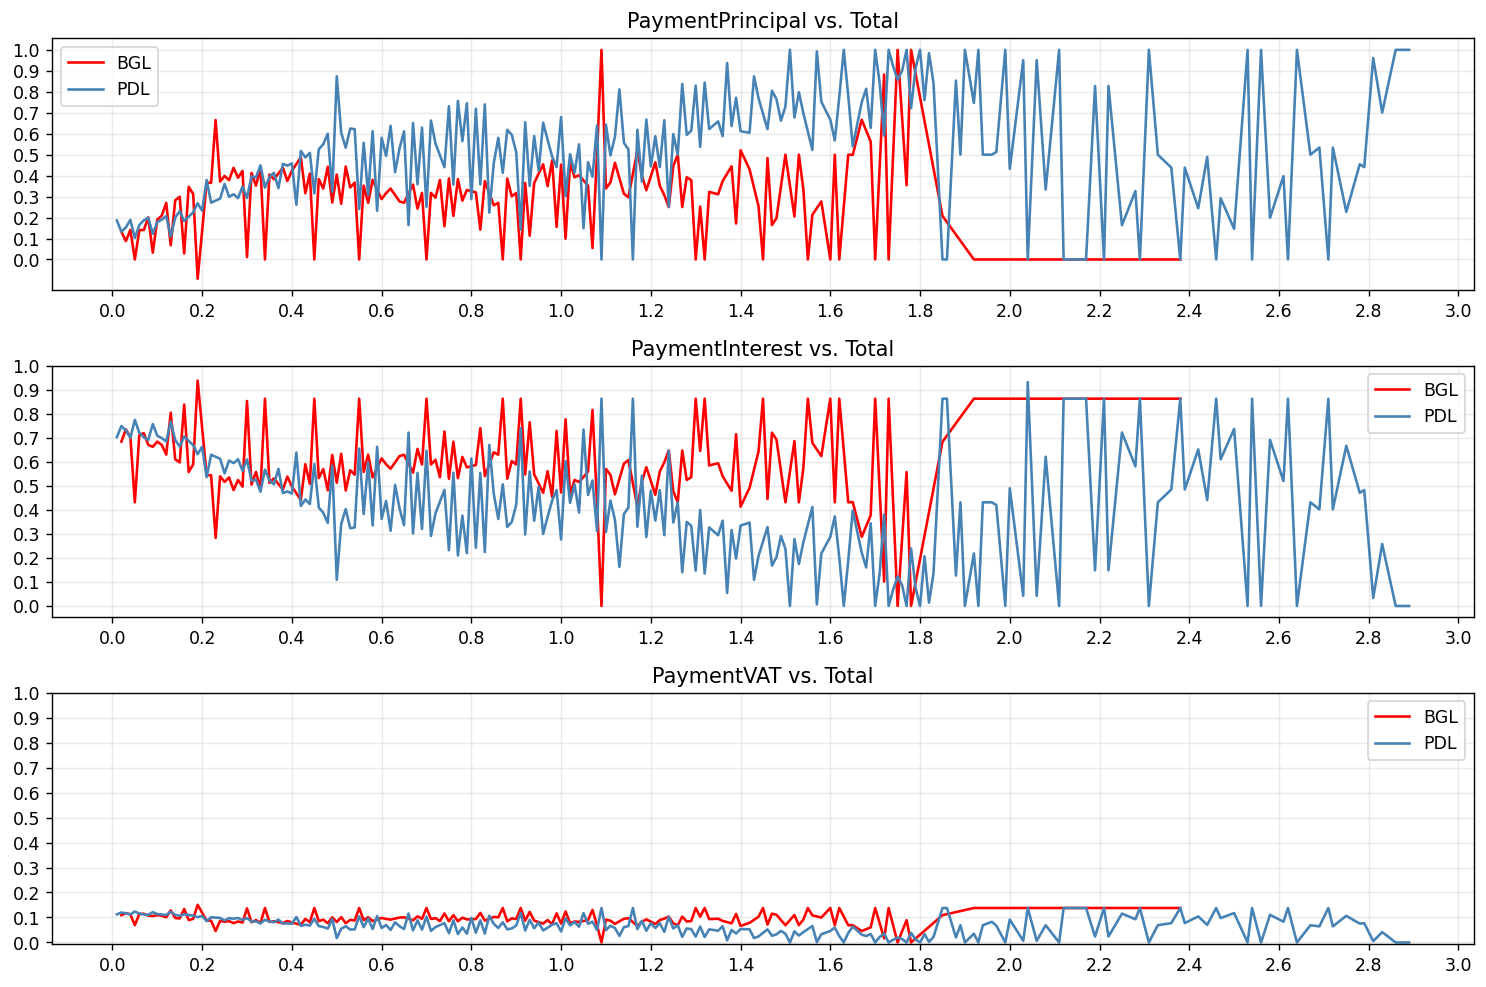

In [166]:
fig, axs = plt.subplots(
    nrows=3, ncols=1, figsize=(12, 8), dpi=125, facecolor="white"
)

pnames = a.ProductName_agency.unique()

for pname in pnames:

    color = "red" if pname == "BGL" else "steelblue"

    axs[0].set_title("PaymentPrincipal vs. Total")
    axs[0].plot(
        a.PaymentTermRelative[a.ProductName_agency == pname],
        a.PaymentPrincipalRelative[a.ProductName_agency == pname],
        color=color,
        label=pname,
    )
    axs[0].grid(alpha=0.25)
    axs[0].legend()

    axs[1].set_title("PaymentInterest vs. Total")
    axs[1].plot(
        a.PaymentTermRelative[a.ProductName_agency == pname],
        a.PaymentInterestRelative[a.ProductName_agency == pname],
        color=color,
        label=pname,
    )
    axs[1].grid(alpha=0.25)
    axs[1].legend()

    axs[2].set_title("PaymentVAT vs. Total")
    axs[2].plot(
        a.PaymentTermRelative[a.ProductName_agency == pname],
        a.PaymentVATRelative[a.ProductName_agency == pname],
        color=color,
        label=pname,
    )
    axs[2].grid(alpha=0.25)
    axs[2].legend()

for ax in axs:
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    ax.set_xticks(np.arange(0, 3.1, 0.2))

plt.tight_layout()
plt.show()

In [180]:
def calculate_last_

funding.Periodicity.unique()

array(['Biweekly', nan, 'Monthly', 'Weekly'], dtype=object)

In [179]:
funding[funding.Periodicity.isna()]

,LoanId,AgencyId,FundingID,OriginationDate,InstallmentAmount,Periodicity,LoanOperationalStatus,VAT,Term
160,122384,827,6,2010-06-10,7749.1992,NaN,Cancelled,16,24
791,120591,819,6,2010-05-31,11664.9600,NaN,Cancelled,16,48
1097,126217,69,6,2010-07-19,47691.3600,NaN,Cancelled,16,72
2295,103867,59,6,2009-12-15,79059.0000,NaN,Cancelled,15,72
2510,107843,218,6,2010-01-30,20607.1200,NaN,Cancelled,16,72
...,...,...,...,...,...,...,...,...,...
175638,354302,808,6,2012-03-21,25170.4400,NaN,Cancelled,16,72
179759,346680,808,6,2011-12-27,23247.6000,NaN,Cancelled,16,24
180657,363718,867,6,2012-07-25,146420.8400,NaN,Cancelled,16,72
182186,347375,808,6,2012-01-12,7749.2000,NaN,Cancelled,16,24


In [189]:
def 
funding.head()

,LoanId,AgencyId,FundingID,OriginationDate,InstallmentAmount,Periodicity,LoanOperationalStatus,VAT,Term
0,125494,808,6,2010-07-08,26495.20,Biweekly,Paid-off,16,72
1,125498,808,6,2010-07-08,25170.44,Biweekly,Paid-off,16,72
2,125505,855,6,2010-07-09,30444.96,Biweekly,Paid-off,16,48
3,125523,11,6,2010-07-08,18148.44,Biweekly,Paid-off,16,24
4,125530,806,6,2010-07-08,26830.93,Biweekly,Paid-off,11,48
